# Exploratory Data Analysis: Credit Risk Dataset

This notebook performs an exploratory analysis of the `credit_risk_dataset.csv` to understand its structure, distributions, and factors contributing to credit default risk.

## 1. Import Libraries and Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
df = pd.read_csv('data/credit_risk_dataset.csv')
df.head()

,age,monthly_income,credit_utilization_ratio,loan_amount,loan_duration_months,num_late_payments,existing_loans_count,account_tenure_years,employment_type,education_level,marital_status,region,customer_financial_statement,sentiment,financial_stress_level,risk_category,default_risk
0,22,1800,0.92,7500,36,4,2,1,Student,Bachelor,Single,Urban,I'm really struggling to make ends meet each m...,Negative,High,High Risk,1
1,45,12500,0.18,30000,48,0,1,15,Salaried,Master,Married,Suburban,"My finances are stable, and I'm actively savin...",Positive,Low,Low Risk,0
2,38,6800,0.68,22000,60,2,3,8,Salaried,Bachelor,Married,Urban,"We're managing, but recent unexpected expenses...",Neutral,Medium,Watchlist,1
3,55,4500,0.35,10000,24,1,0,20,Self-Employed,Diploma,Divorced,Rural,I'm comfortable with my current financial situ...,Positive,Low,Low Risk,0
4,28,3200,0.85,12000,48,3,1,3,Salaried,Bachelor,Single,Urban,I'm constantly worried about my credit card de...,Negative,High,High Risk,1


## 2. Initial Data Inspection

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           1500 non-null   int64  
 1   monthly_income                1500 non-null   int64  
 2   credit_utilization_ratio      1500 non-null   float64
 3   loan_amount                   1500 non-null   int64  
 4   loan_duration_months          1500 non-null   int64  
 5   num_late_payments             1500 non-null   int64  
 6   existing_loans_count          1500 non-null   int64  
 7   account_tenure_years          1500 non-null   int64  
 8   employment_type               1500 non-null   object 
 9   education_level               1500 non-null   object 
 10  marital_status                1500 non-null   object 
 11  region                        1500 non-null   object 
 12  customer_financial_statement  1500 non-null   object 
 13  sen

In [4]:
df.describe()

,age,monthly_income,credit_utilization_ratio,loan_amount,loan_duration_months,num_late_payments,existing_loans_count,account_tenure_years,default_risk
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,40.588667,5957.533333,0.529920,15627.333333,36.288000,1.730667,1.635333,10.121333,0.364667
std,13.825589,4374.174076,0.290223,13019.951318,16.934114,2.327890,1.135728,6.377805,0.481497
min,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,2800.000000,0.250000,6000.000000,24.000000,0.000000,1.000000,4.750000,0.000000
50%,39.000000,4500.000000,0.550000,10000.000000,36.000000,1.000000,1.000000,10.000000,0.000000
75%,50.000000,7500.000000,0.800000,22000.000000,48.000000,3.000000,2.000000,16.000000,1.000000
max,70.000000,20000.000000,1.000000,50000.000000,60.000000,10.000000,5.000000,20.000000,1.000000


## 3. Data Cleaning and Missing Values

In [5]:
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values[missing_values > 0])

Missing values per column:
 Series([], dtype: int64)


## 4. Univariate Analysis

Exploring the distribution of individual features.

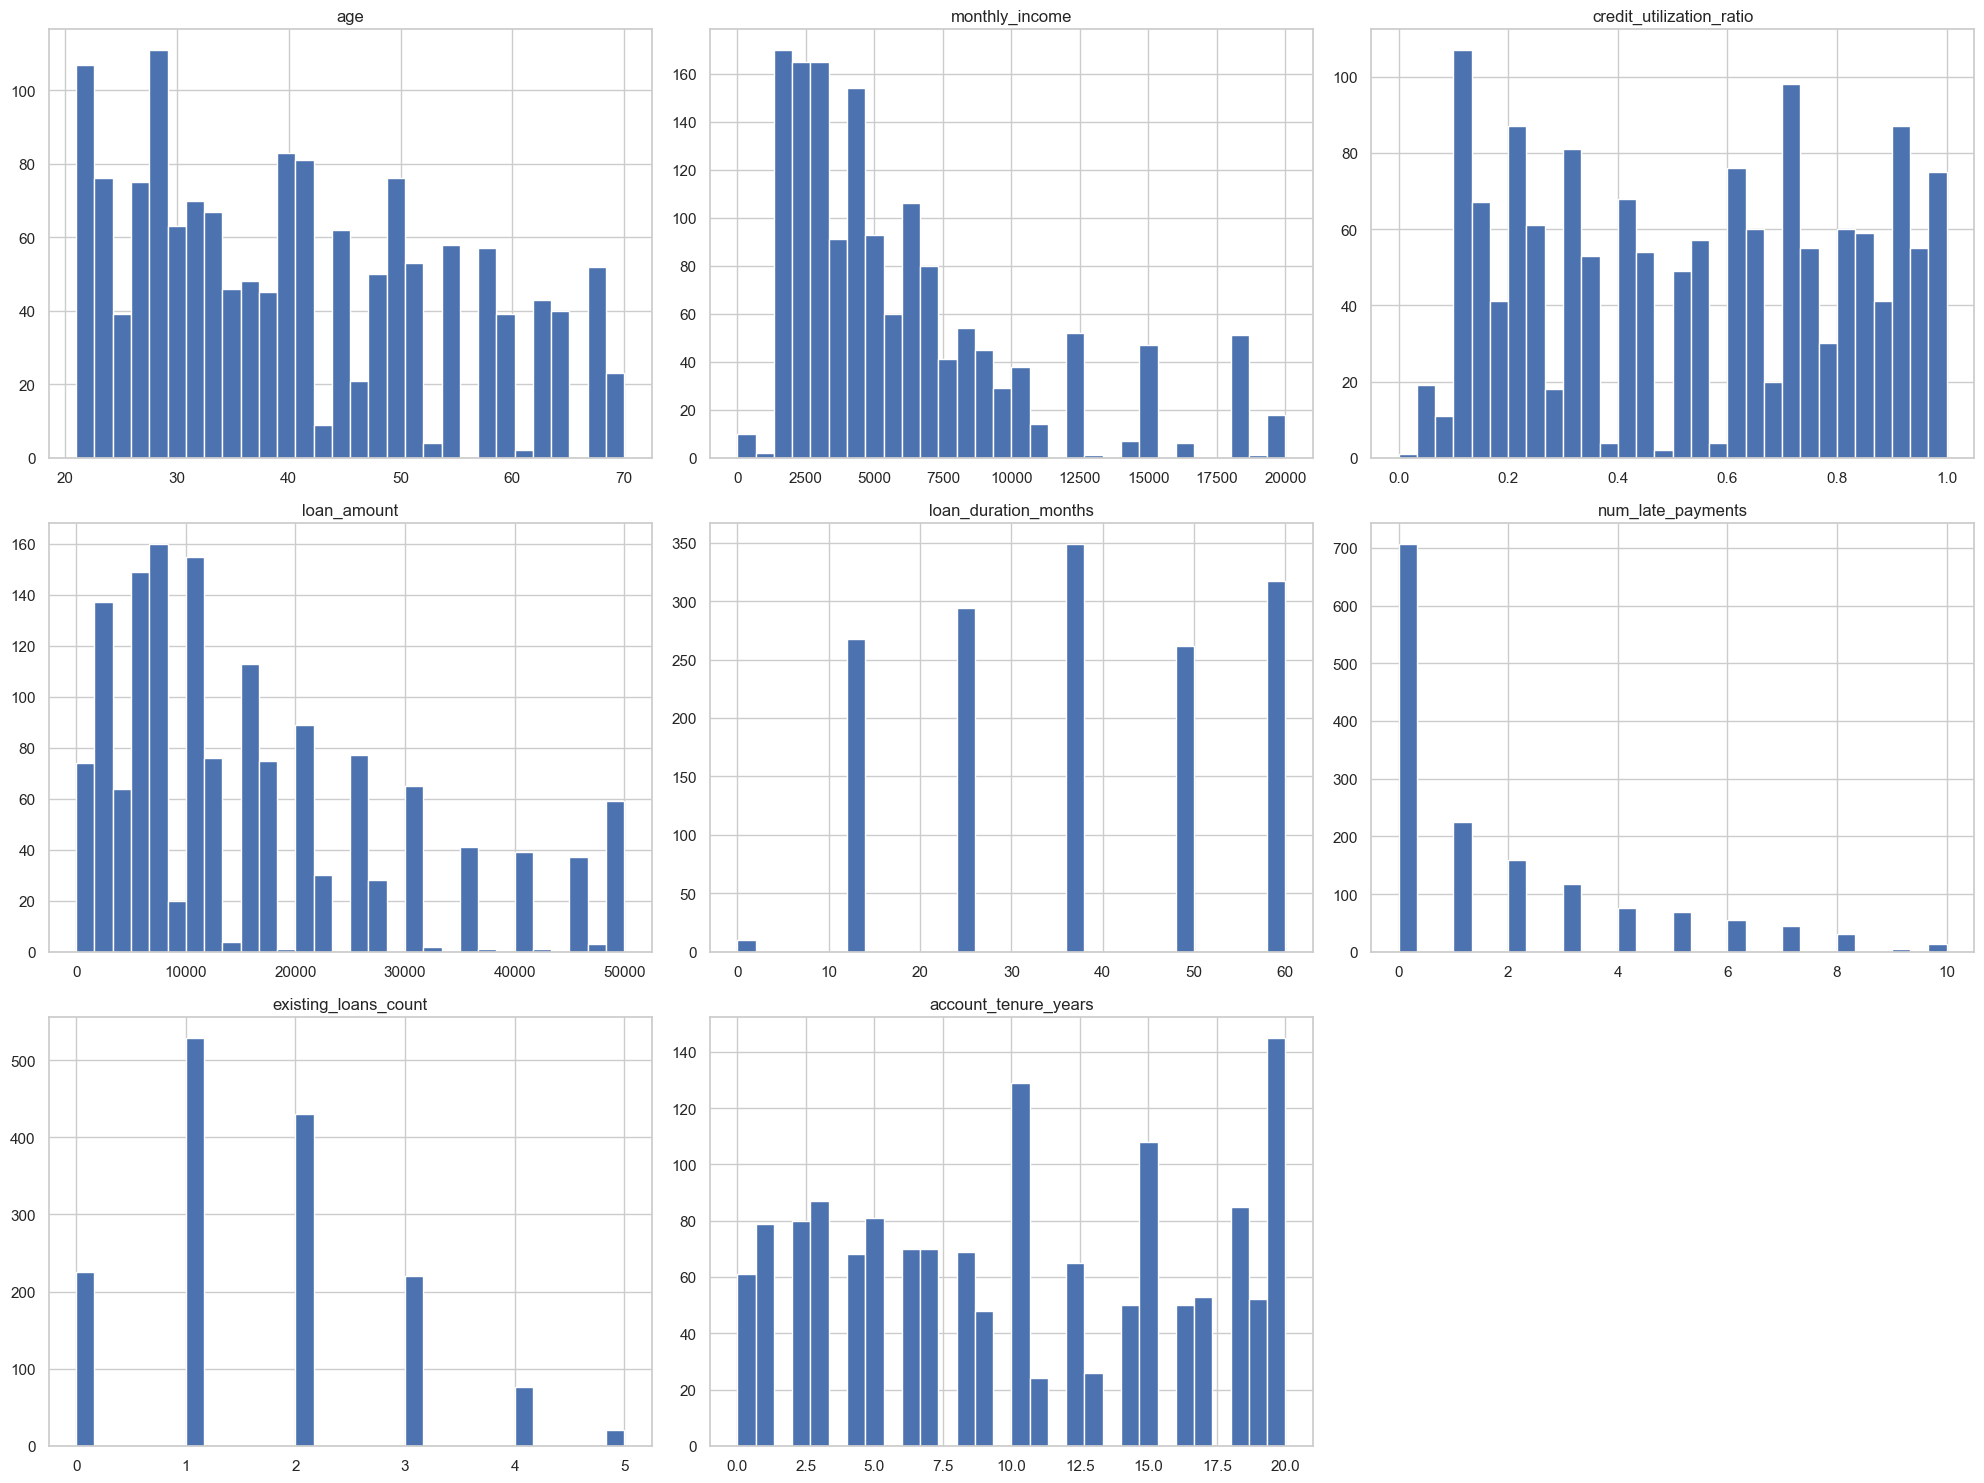

In [6]:
numerical_cols = ['age', 'monthly_income', 'credit_utilization_ratio', 'loan_amount', \
                  'loan_duration_months', 'num_late_payments', 'existing_loans_count', 'account_tenure_years']

df[numerical_cols].hist(bins=30, figsize=(20, 15))
plt.tight_layout()
plt.show()

## 5. Categorical Analysis

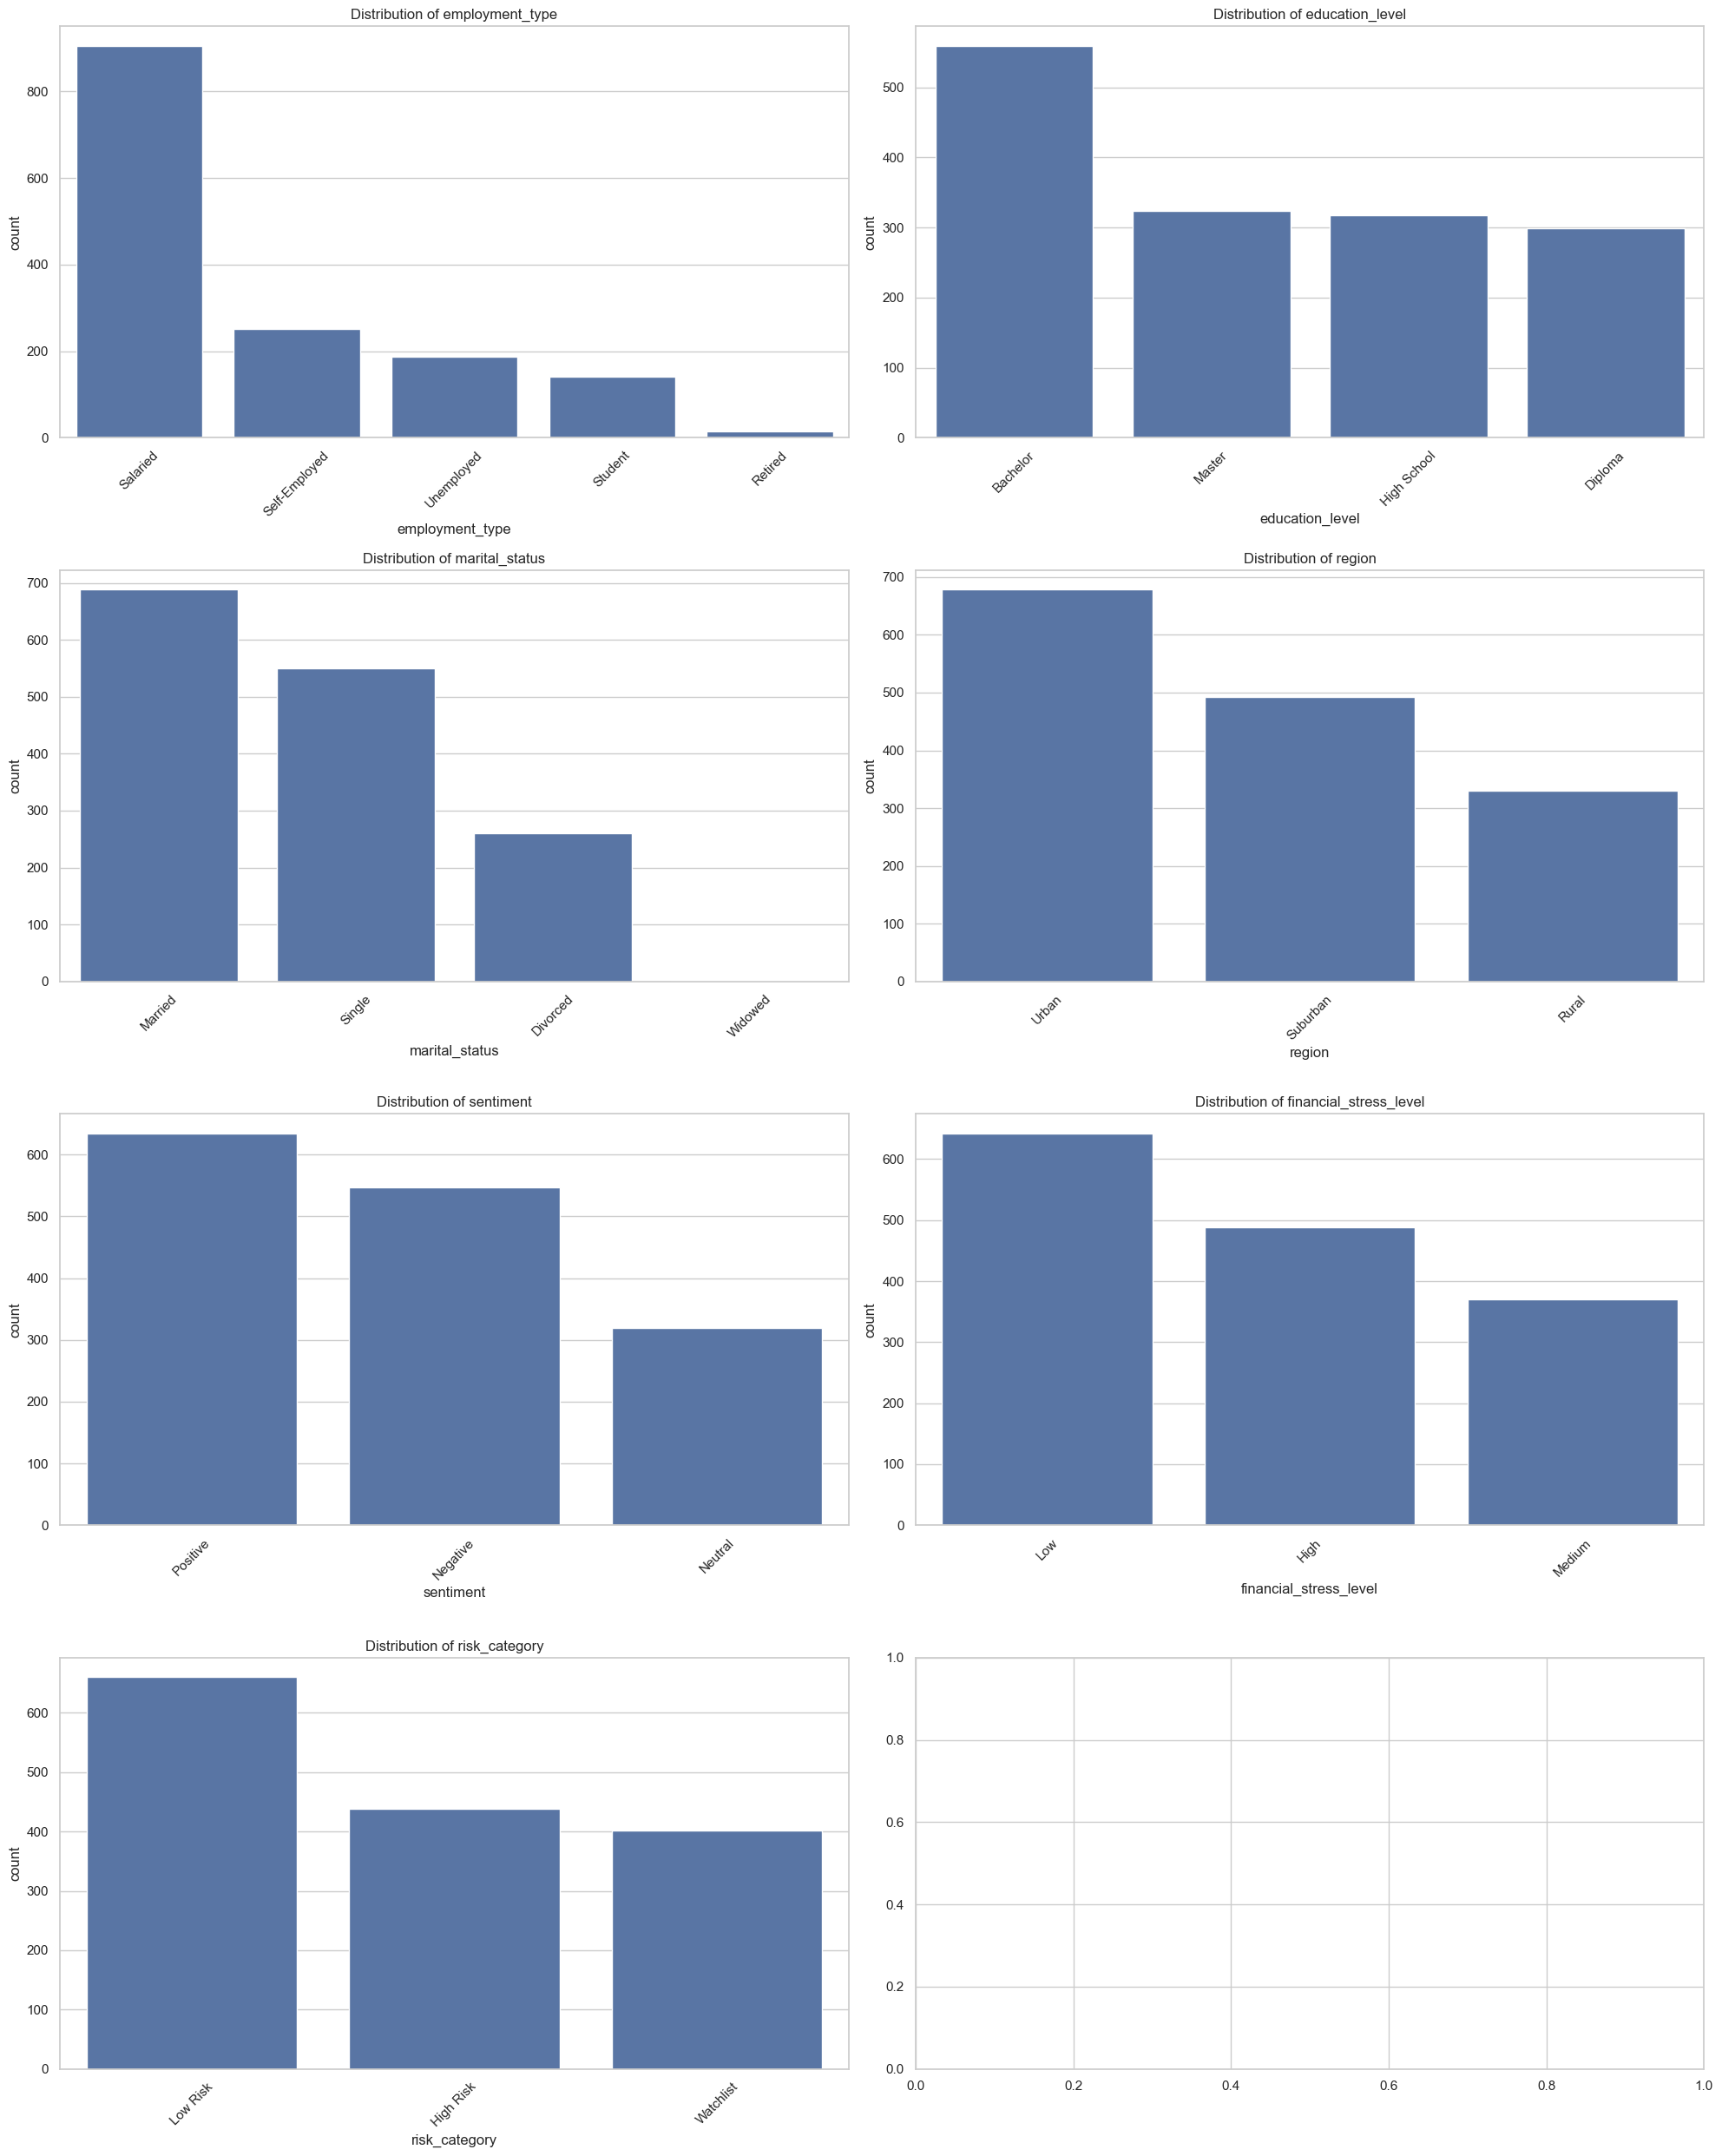

In [7]:
categorical_cols = ['employment_type', 'education_level', 'marital_status', 'region', 'sentiment', 'financial_stress_level', 'risk_category']

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 25))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, ax=axes[i], order=df[col].value_counts().index)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 6. Relationship with Target Variable (`default_risk`)

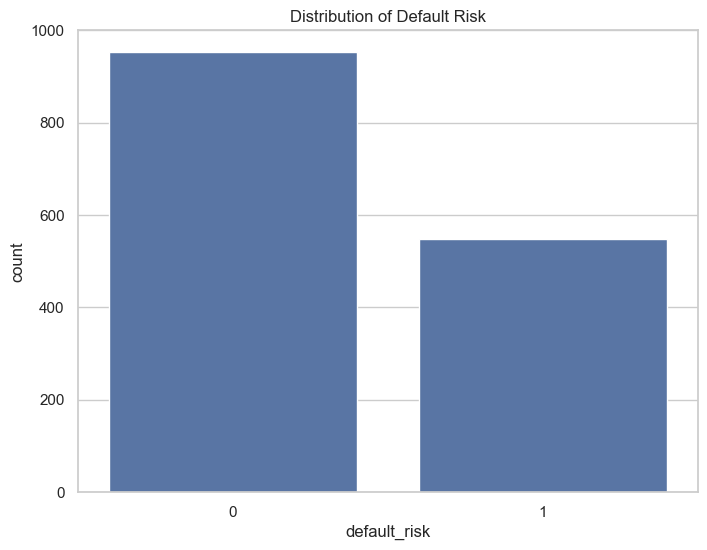

In [8]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='default_risk')
plt.title('Distribution of Default Risk')
plt.show()

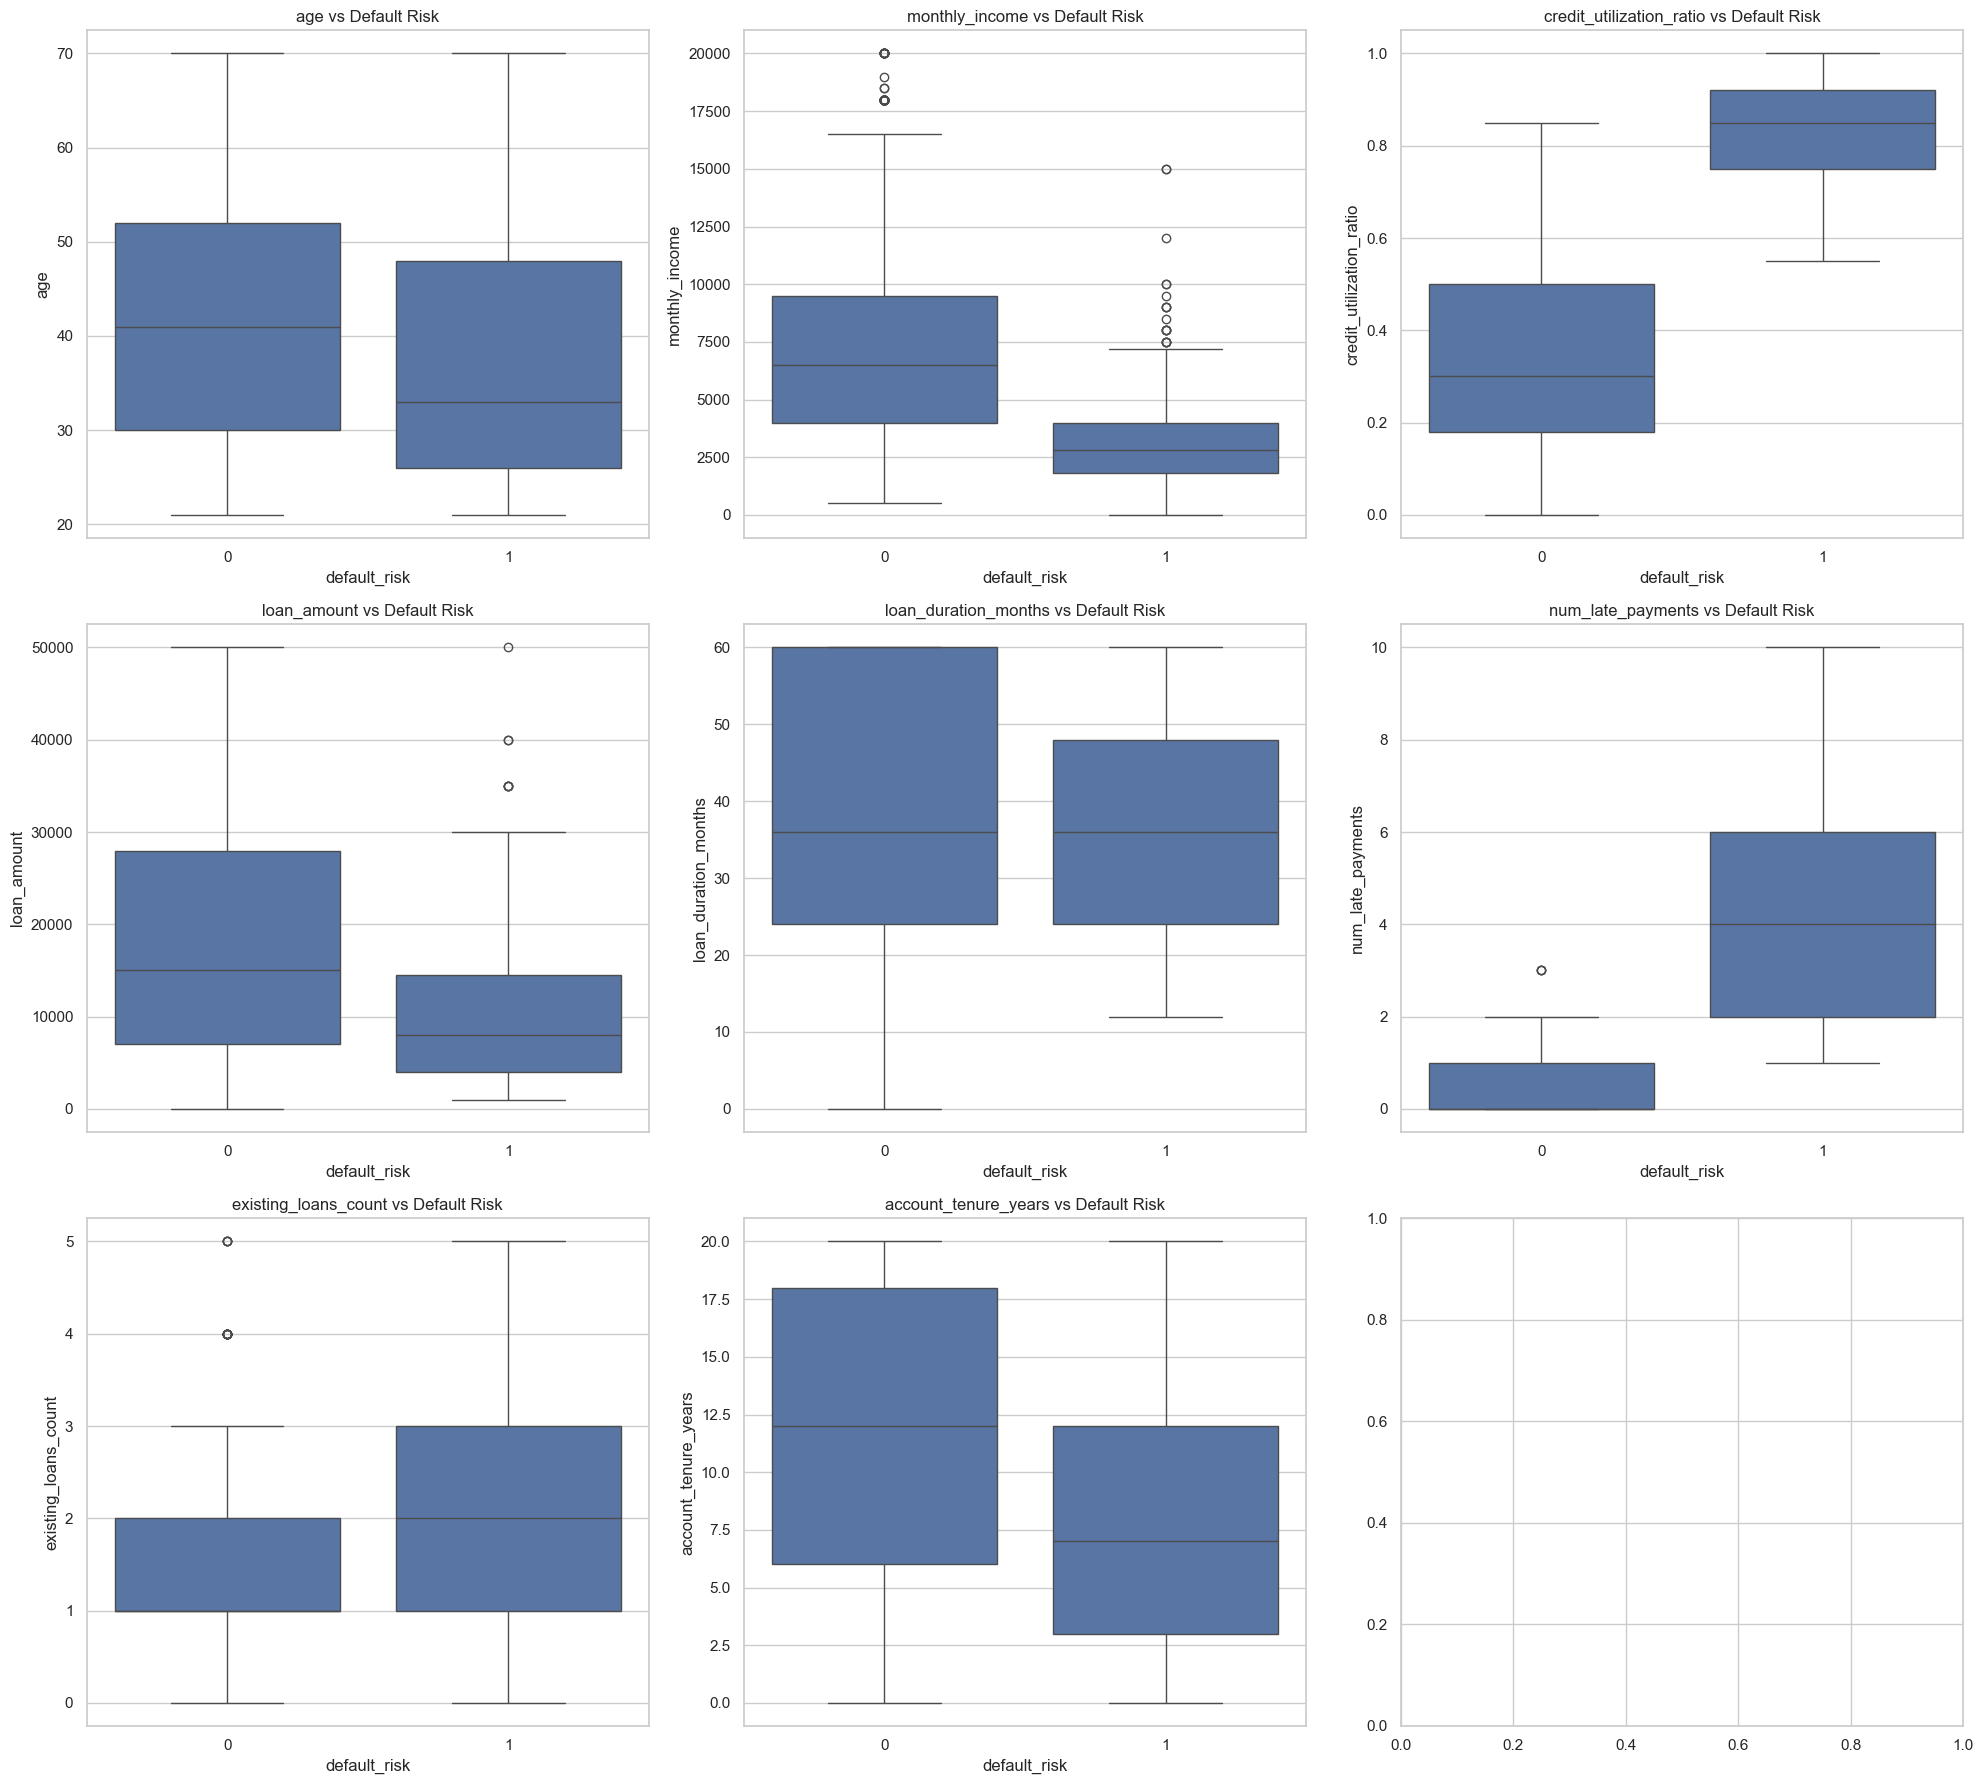

In [9]:
# Boxplots for numerical variables vs default_risk
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 18))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(data=df, x='default_risk', y=col, ax=axes[i])
    axes[i].set_title(f'{col} vs Default Risk')

plt.tight_layout()
plt.show()

## 7. Correlation Analysis

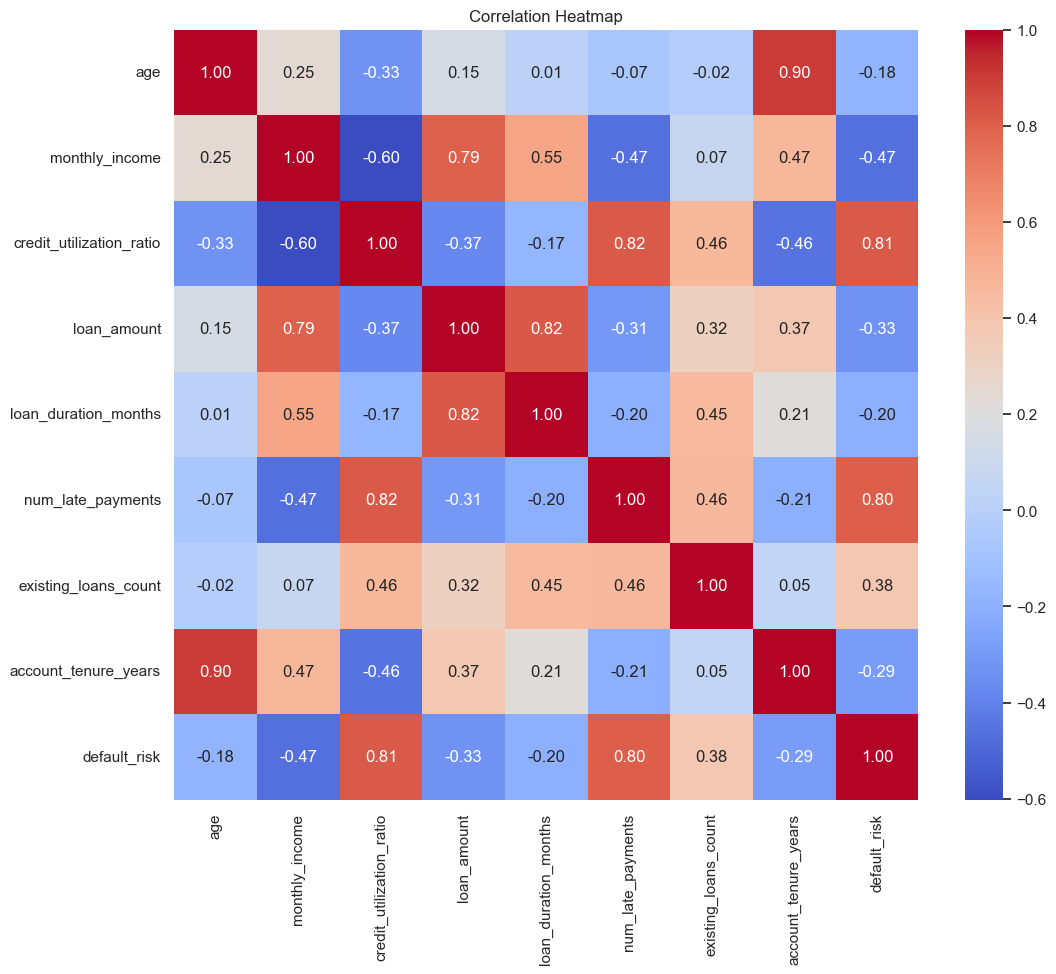

In [10]:
plt.figure(figsize=(12, 10))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()